In [71]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler  
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE,ADASYN

In [113]:
df = pd.read_csv('US_Heart_Patients.csv')

In [114]:
df.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,Female,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,Female,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,Male,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,Male,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [5]:
cat = ['Gender','education','currentSmoker','BP Meds','prevalentStroke','prevalentHyp','diabetes']
num = ['age','cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose']

In [116]:
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [117]:
(round(df.isnull().sum() / len(df) * 100),2)

(Gender             0.0
 age                0.0
 education          3.0
 currentSmoker      0.0
 cigsPerDay         1.0
 BP Meds            1.0
 prevalentStroke    0.0
 prevalentHyp       0.0
 diabetes           0.0
 tot cholesterol    1.0
 Systolic BP        0.0
 Diastolic BP       0.0
 BMI                1.0
 heartRate          0.0
 glucose            9.0
 Heart-Att          0.0
 dtype: float64,
 2)

In [118]:
df = df.replace({'Male': 1, 'Female': 0})

In [119]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1.0,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [120]:
for i in df[num].columns:
    df[i].fillna(df[i].mean(),inplace = True)

In [121]:
for i in df[cat].columns:
    df[i].fillna(df[i].mode()[0],inplace = True)

In [122]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

### Model Building

In [123]:
X = df.drop("Heart-Att" , axis=1)
y = df.pop("Heart-Att")

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [15]:
DT = DecisionTreeClassifier(criterion= 'gini')

In [16]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

#### Model Evaluation

In [17]:
y_train_predict = DT.predict(X_train)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

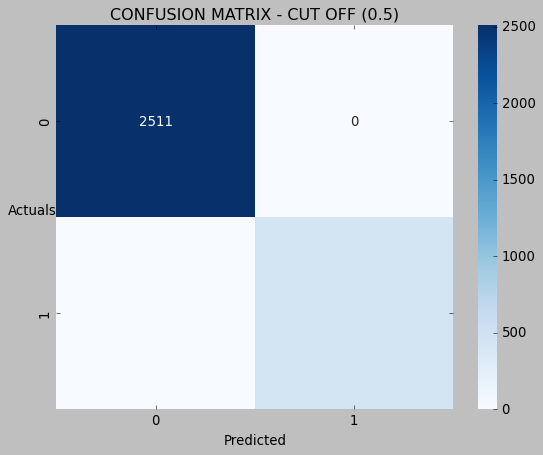

In [18]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [19]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



AUC: 1.000


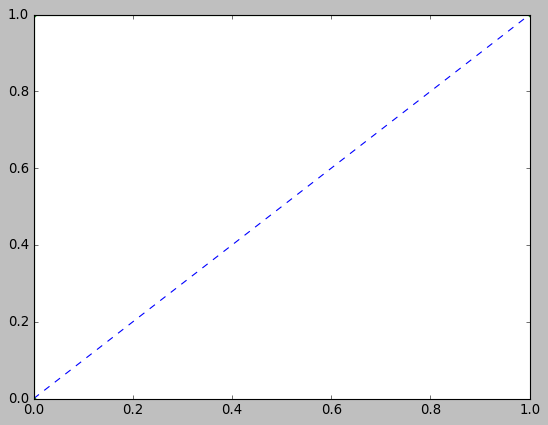

In [20]:
probs = DT.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [21]:
y_test_predict = DT.predict(X_test)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

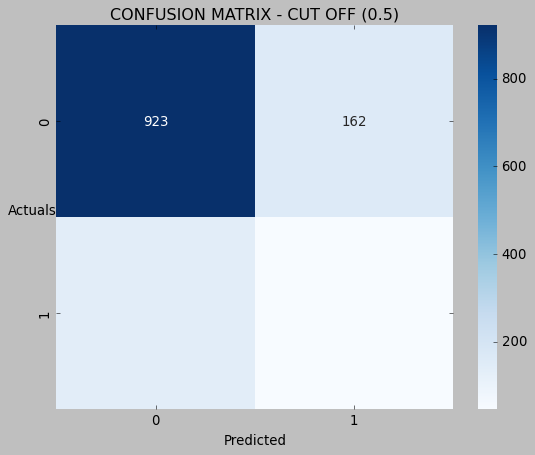

In [22]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [23]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1085
           1       0.22      0.25      0.23       187

    accuracy                           0.76      1272
   macro avg       0.54      0.55      0.55      1272
weighted avg       0.77      0.76      0.77      1272



AUC: 0.548


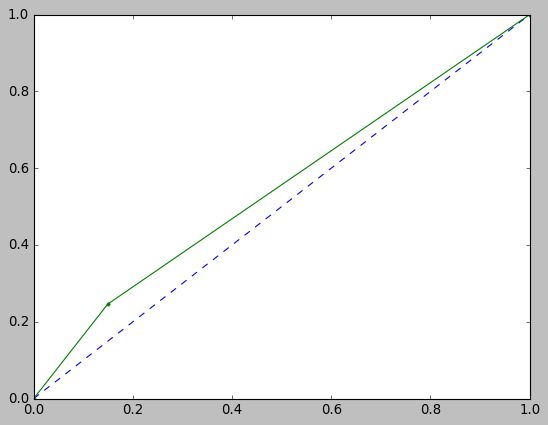

In [24]:
probs = DT.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

##### Feature Importance

In [25]:
DT.feature_importances_

array([0.02552987, 0.14455058, 0.03132178, 0.00490836, 0.05241193,
       0.00832428, 0.00426238, 0.00880797, 0.00199525, 0.17426963,
       0.1143652 , 0.0814665 , 0.1482421 , 0.09724818, 0.10229599])

In [26]:
print (pd.DataFrame(DT.feature_importances_ * 100, columns = ["Imp"], index = X_train.columns).sort_values(by = "Imp",ascending = False))

                       Imp
tot cholesterol  17.426963
BMI              14.824210
age              14.455058
Systolic BP      11.436520
glucose          10.229599
heartRate         9.724818
Diastolic BP      8.146650
cigsPerDay        5.241193
education         3.132178
Gender            2.552987
prevalentHyp      0.880797
BP Meds           0.832428
currentSmoker     0.490836
prevalentStroke   0.426238
diabetes          0.199525


# KNN Classifier

In [124]:
#KNN = KNeighborsClassifier(n_neighbors=7)
KNN = KNeighborsClassifier(n_neighbors=7)

In [125]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

##### Model Evaluation

In [126]:
y_train_predict = KNN.predict(X_train)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

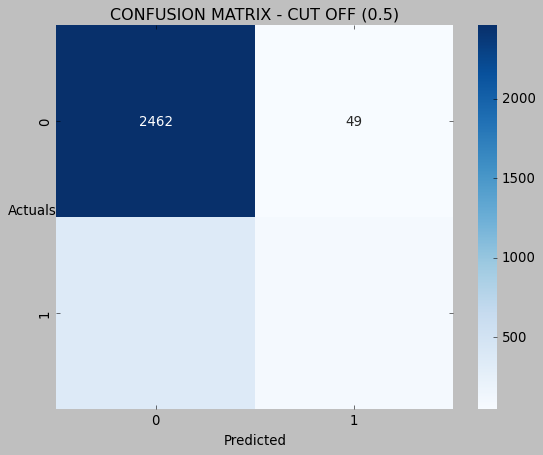

In [30]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [31]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2511
           1       0.66      0.21      0.32       457

    accuracy                           0.86      2968
   macro avg       0.77      0.59      0.62      2968
weighted avg       0.84      0.86      0.83      2968



AUC: 0.865


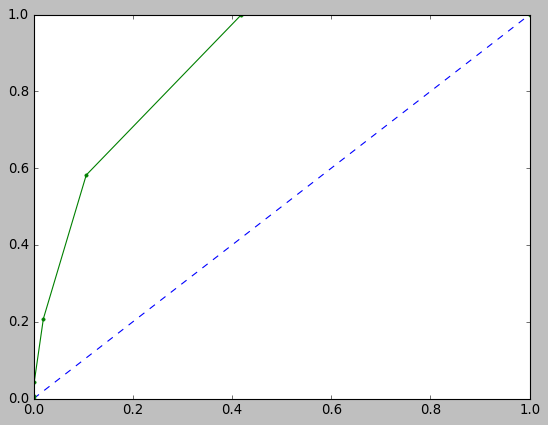

In [32]:
probs = KNN.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [127]:
y_test_predict = KNN.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1085
           1       0.36      0.11      0.17       187

    accuracy                           0.84      1272
   macro avg       0.61      0.54      0.54      1272
weighted avg       0.79      0.84      0.80      1272



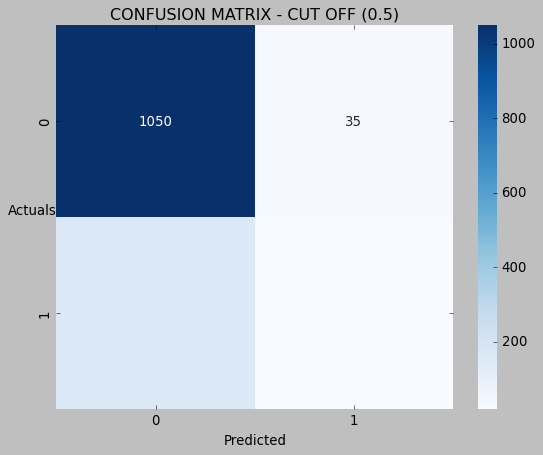

In [34]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.649


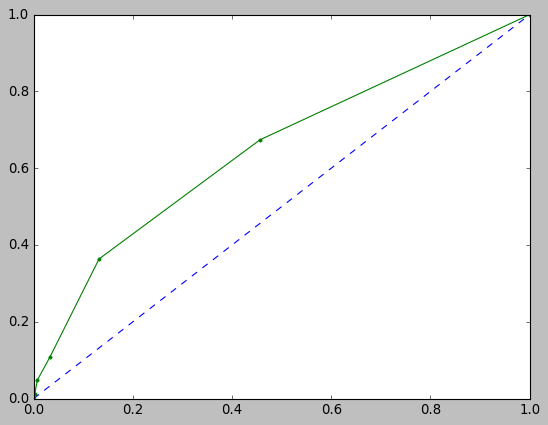

In [35]:
probs = KNN.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Run the Grid Search CV for KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize KNN classifier
KNN = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [2, 5, 15, 30, 45, 64],  # Corrected the key name from 'n_neighbours' to 'n_neighbors'
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 40, 1],  # Tuple corrected to list format
    'p': [1, 2],  # Tuple corrected to list format
    'metric': ['minkowski', 'chebyshev']  # Tuple corrected to list format
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=KNN, param_grid=param_grid,
                           scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
Best parameters: {'algorithm': 'ball_tree', 'leaf_size': 20, 'metric': 'chebyshev', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
Best score: 0.8473757848757849


In [37]:
KNN_grid = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 20, metric = 'chebyshev', n_neighbors = 15, p = 1, weights = 'uniform')

In [38]:
KNN_grid.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, metric='chebyshev',
                     n_neighbors=15, p=1)

In [39]:
y_train_predict = KNN_grid.predict(X_train)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

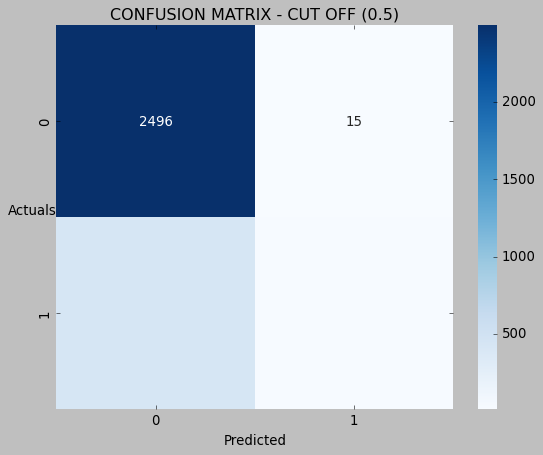

In [40]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [41]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2511
           1       0.63      0.06      0.10       457

    accuracy                           0.85      2968
   macro avg       0.74      0.53      0.51      2968
weighted avg       0.82      0.85      0.79      2968



AUC: 0.772


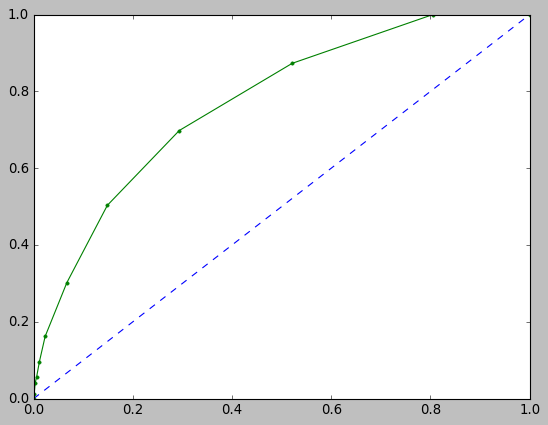

In [42]:
probs = KNN_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [43]:
y_test_predict = KNN_grid.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1085
           1       0.47      0.05      0.09       187

    accuracy                           0.85      1272
   macro avg       0.67      0.52      0.50      1272
weighted avg       0.80      0.85      0.80      1272



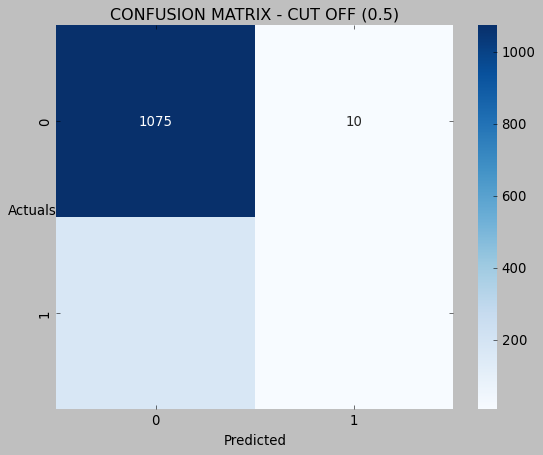

In [44]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.662


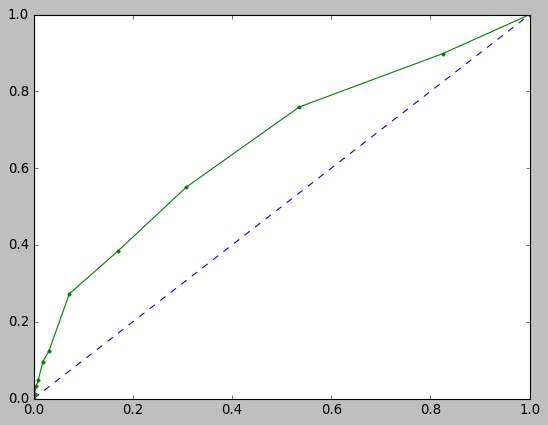

In [45]:
probs = KNN_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [46]:
DT = DecisionTreeClassifier()

In [47]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
DT_y_train_predict = DT.predict(X_train)
DT_y_test_predict = DT.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



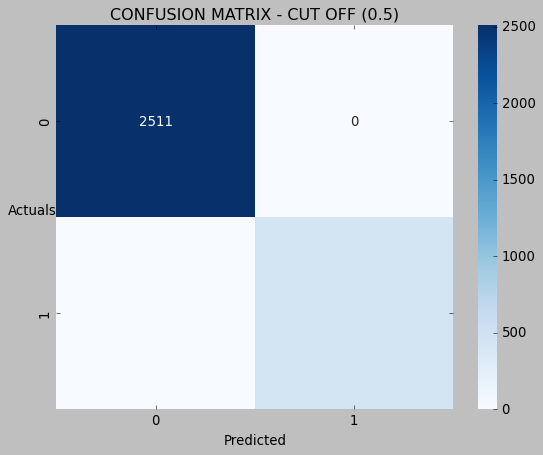

In [49]:
sns.heatmap((metrics.confusion_matrix(y_train,DT_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, DT_y_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1085
           1       0.23      0.27      0.25       187

    accuracy                           0.76      1272
   macro avg       0.55      0.56      0.55      1272
weighted avg       0.78      0.76      0.77      1272



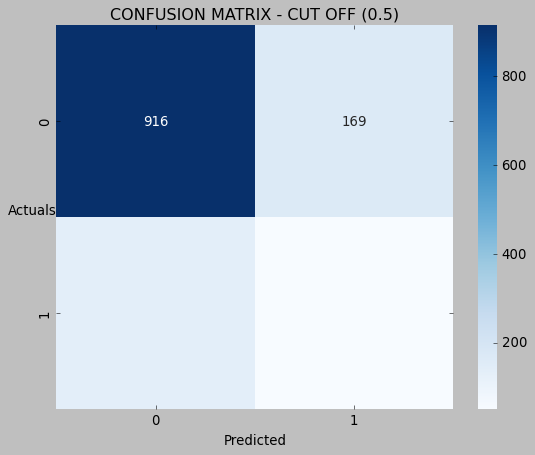

In [50]:
sns.heatmap((metrics.confusion_matrix(y_test,DT_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, DT_y_test_predict))

#### Bagging

In [51]:
bag_DT = BaggingClassifier(estimator=KNN, n_estimators=100, random_state=42)

In [52]:
bag_DT.fit(X_train,y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=100,
                  random_state=42)

In [53]:
bagDT_y_train_predict = bag_DT.predict(X_train)
bagDT_y_test_predict = bag_DT.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2511
           1       0.77      0.19      0.30       457

    accuracy                           0.87      2968
   macro avg       0.82      0.59      0.61      2968
weighted avg       0.85      0.87      0.83      2968



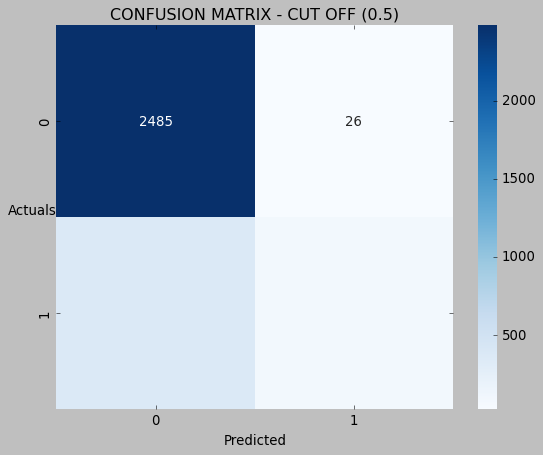

In [54]:
sns.heatmap((metrics.confusion_matrix(y_train,bagDT_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, bagDT_y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1085
           1       0.36      0.09      0.14       187

    accuracy                           0.84      1272
   macro avg       0.61      0.53      0.53      1272
weighted avg       0.79      0.84      0.80      1272



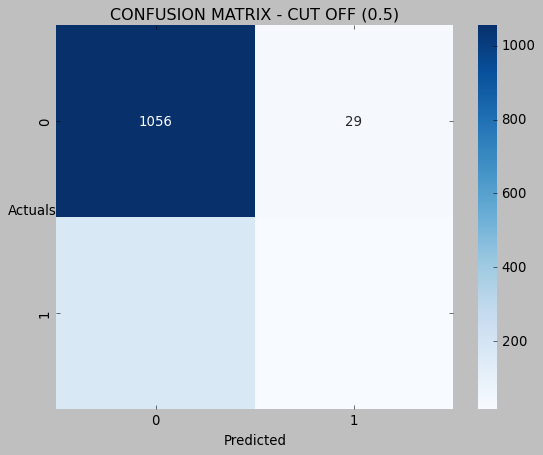

In [55]:
sns.heatmap((metrics.confusion_matrix(y_test,bagDT_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, bagDT_y_test_predict))

#### Random Forest

In [56]:
RF = RandomForestClassifier(random_state=10)

In [57]:
RF.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [58]:
RF_y_train_predict = RF.predict(X_train)
RF_y_test_predict = RF.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



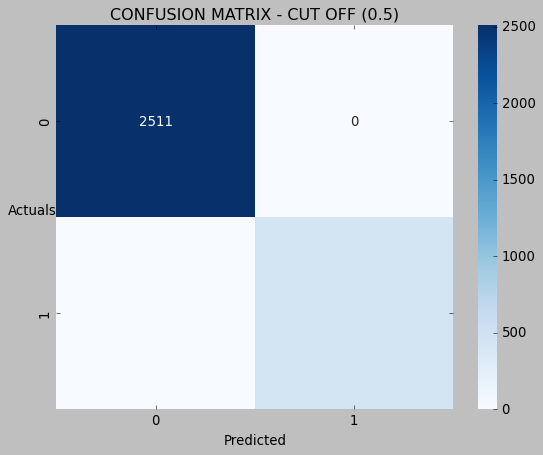

In [59]:
sns.heatmap((metrics.confusion_matrix(y_train,RF_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, RF_y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1085
           1       0.48      0.05      0.10       187

    accuracy                           0.85      1272
   macro avg       0.67      0.52      0.51      1272
weighted avg       0.80      0.85      0.80      1272



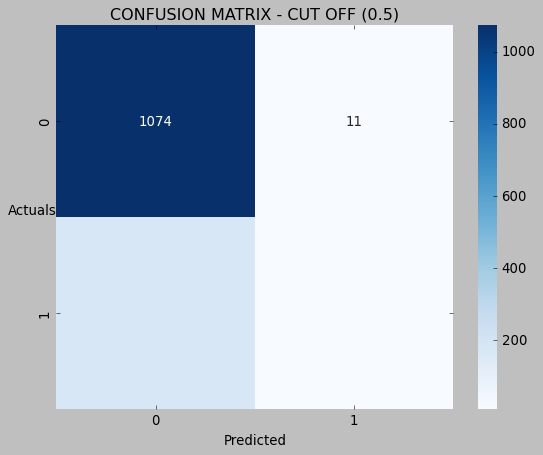

In [60]:
sns.heatmap((metrics.confusion_matrix(y_test,RF_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, RF_y_test_predict))

#### Adaboost

In [61]:
adb = AdaBoostClassifier()

In [62]:
adb.fit(X_train,y_train)

AdaBoostClassifier()

In [63]:
adb_y_train_predict = adb.predict(X_train)
adb_y_test_predict = adb.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2511
           1       0.66      0.11      0.19       457

    accuracy                           0.85      2968
   macro avg       0.76      0.55      0.56      2968
weighted avg       0.83      0.85      0.81      2968



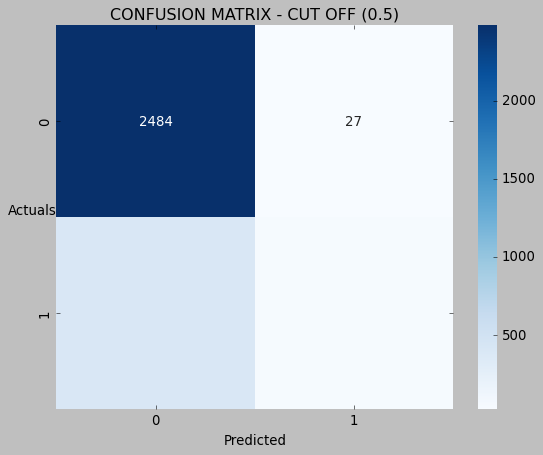

In [64]:
sns.heatmap((metrics.confusion_matrix(y_train,adb_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, adb_y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1085
           1       0.52      0.07      0.13       187

    accuracy                           0.85      1272
   macro avg       0.69      0.53      0.53      1272
weighted avg       0.81      0.85      0.80      1272



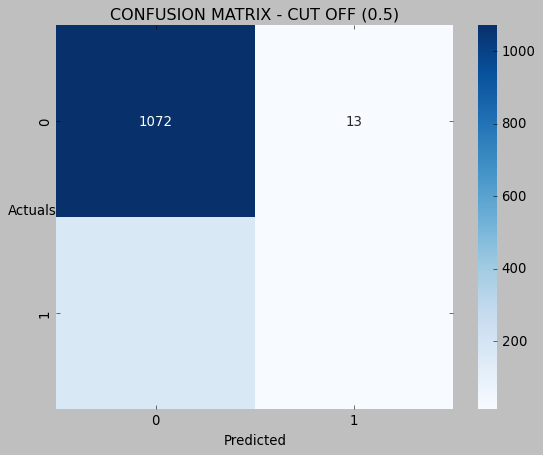

In [65]:
sns.heatmap((metrics.confusion_matrix(y_test,adb_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, adb_y_test_predict))

#### Gradientboost

In [66]:
GB = GradientBoostingClassifier()

In [67]:
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [68]:
GB_y_train_predict = GB.predict(X_train)
GB_y_test_predict = GB.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2511
           1       0.99      0.24      0.39       457

    accuracy                           0.88      2968
   macro avg       0.93      0.62      0.66      2968
weighted avg       0.90      0.88      0.85      2968



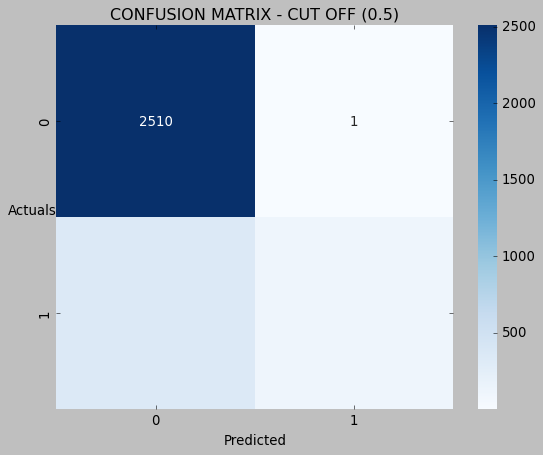

In [69]:
sns.heatmap((metrics.confusion_matrix(y_train,GB_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, GB_y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1085
           1       0.44      0.09      0.14       187

    accuracy                           0.85      1272
   macro avg       0.65      0.53      0.53      1272
weighted avg       0.80      0.85      0.80      1272



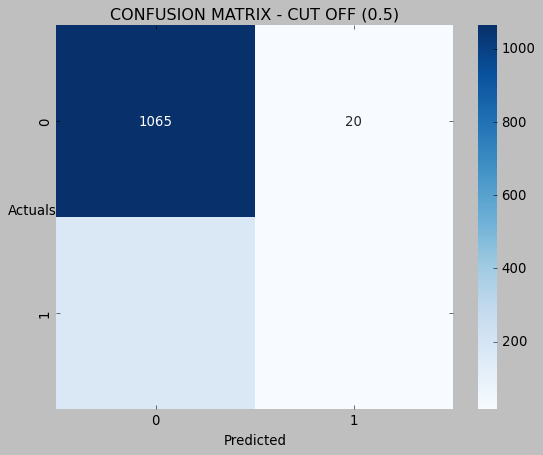

In [70]:
sns.heatmap((metrics.confusion_matrix(y_test,GB_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, GB_y_test_predict))

In [72]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.951936
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.000000
4238,1.0,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.000000


In [75]:
scaler = StandardScaler()
#model = scaler.fit(df.drop('Heart-Att',axis = 1))
model = scaler.fit(df)

In [76]:
#scaled_data = model.transform(df.drop('Heart-Att',axis = 1))
scaled_data = model.transform(df)

In [77]:
scaled_data

array([[ 1.15422408, -1.23447821,  2.00839068, ...,  0.28821546,
         0.34456793, -0.2169612 ],
       [-0.8663829 , -0.41766031,  0.04469266, ...,  0.72136903,
         1.59535897, -0.26077461],
       [ 1.15422408, -0.18428377, -0.93715636, ..., -0.11294382,
        -0.07236242, -0.52365508],
       ...,
       [-0.8663829 ,  0.28246932,  0.04469266, ..., -1.06538945,
         0.34456793,  1.09744118],
       [ 1.15422408, -1.11778994,  1.02654167, ..., -0.04895522,
        -0.73945097, -0.43602826],
       [-0.8663829 , -1.23447821,  1.02654167, ..., -1.20321105,
         0.76149828, -0.08552096]])

In [81]:
X = scaled_data

In [83]:
print(X)
print()
print(y)

[[ 1.15422408 -1.23447821  2.00839068 ...  0.28821546  0.34456793
  -0.2169612 ]
 [-0.8663829  -0.41766031  0.04469266 ...  0.72136903  1.59535897
  -0.26077461]
 [ 1.15422408 -0.18428377 -0.93715636 ... -0.11294382 -0.07236242
  -0.52365508]
 ...
 [-0.8663829   0.28246932  0.04469266 ... -1.06538945  0.34456793
   1.09744118]
 [ 1.15422408 -1.11778994  1.02654167 ... -0.04895522 -0.73945097
  -0.43602826]
 [-0.8663829  -1.23447821  1.02654167 ... -1.20321105  0.76149828
  -0.08552096]]

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: Heart-Att, Length: 4240, dtype: int64


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [85]:
X_train

array([[-0.8663829 , -0.06759549, -0.93715636, ...,  0.50971444,
         1.67874504, -0.08552096],
       [ 1.15422408, -0.41766031,  1.02654167, ..., -0.74790758,
        -0.90622311, -0.74272215],
       [ 1.15422408, -0.41766031, -0.93715636, ..., -0.74298538,
        -1.4899256 , -0.34840143],
       ...,
       [ 1.15422408, -1.35116648,  0.04469266, ...,  1.24312219,
         1.59535897,  0.        ],
       [-0.8663829 ,  0.63253414,  0.04469266, ..., -0.67653568,
         0.76149828, -0.65509532],
       [-0.8663829 , -1.58454303, -0.93715636, ..., -0.80451287,
        -0.23913455, -0.30458802]])

In [86]:
X_test

array([[ 1.15422408, -1.58454303, -0.93715636, ...,  1.26034989,
        -0.32252062, -0.52365508],
       [ 1.15422408, -1.23447821,  0.04469266, ...,  0.62292503,
         1.59535897, -0.12933437],
       [-0.8663829 , -0.65103685,  0.04469266, ..., -1.11215035,
         0.76149828, -0.2169612 ],
       ...,
       [-0.8663829 , -0.06759549, -0.93715636, ...,  0.87641832,
         0.26118186, -0.08552096],
       [-0.8663829 ,  0.16578105,  0.04469266, ...,  0.39896495,
         0.34456793,  0.1335461 ],
       [-0.8663829 , -1.35116648, -0.93715636, ..., -1.01616746,
         0.76149828,  1.14125459]])

In [88]:
y_train

4033    0
3710    0
1453    0
2425    0
1010    0
       ..
2895    0
2763    0
905     0
3980    0
235     0
Name: Heart-Att, Length: 2968, dtype: int64

In [89]:
y_test

534     0
2751    0
3599    0
518     0
3813    0
       ..
1962    0
346     0
2346    0
582     0
3626    0
Name: Heart-Att, Length: 1272, dtype: int64

 #### GB With Scaling

In [87]:
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [90]:
GB_y_train_predict = GB.predict(X_train)
GB_y_test_predict = GB.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2511
           1       0.99      0.24      0.39       457

    accuracy                           0.88      2968
   macro avg       0.93      0.62      0.66      2968
weighted avg       0.90      0.88      0.85      2968



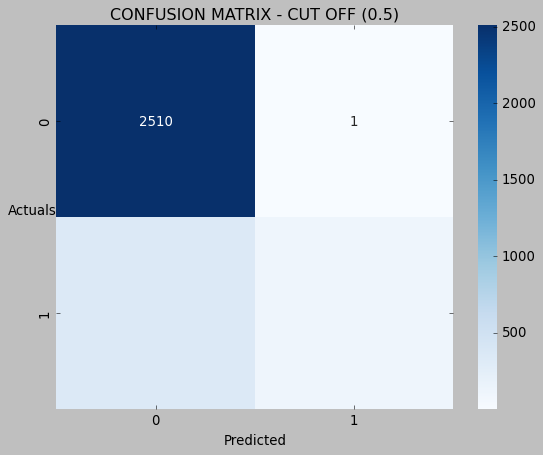

In [91]:
sns.heatmap((metrics.confusion_matrix(y_train,GB_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, GB_y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1085
           1       0.49      0.09      0.15       187

    accuracy                           0.85      1272
   macro avg       0.67      0.54      0.54      1272
weighted avg       0.81      0.85      0.81      1272



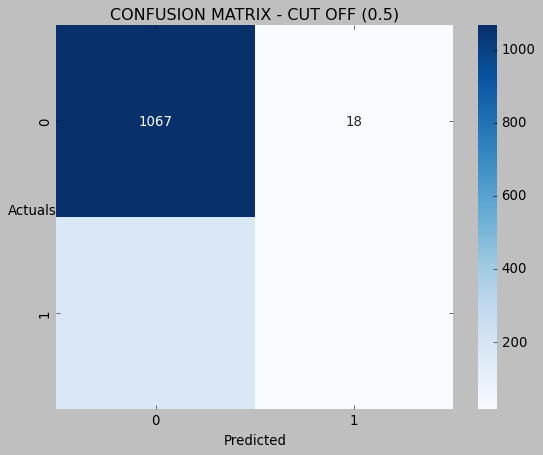

In [92]:
sns.heatmap((metrics.confusion_matrix(y_test,GB_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, GB_y_test_predict))

In [93]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [94]:
KNNs_y_train_predict = KNN.predict(X_train)
KNNs_y_test_predict = KNN.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      2511
           1       0.71      0.22      0.33       457

    accuracy                           0.87      2968
   macro avg       0.79      0.60      0.63      2968
weighted avg       0.85      0.87      0.83      2968



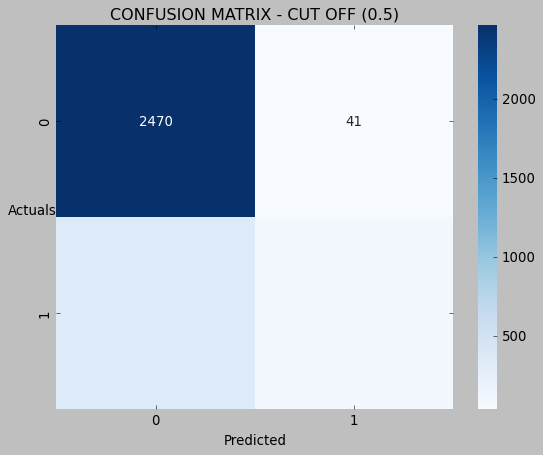

In [95]:
sns.heatmap((metrics.confusion_matrix(y_train,KNNs_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, KNNs_y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1085
           1       0.37      0.11      0.17       187

    accuracy                           0.84      1272
   macro avg       0.62      0.54      0.54      1272
weighted avg       0.79      0.84      0.80      1272



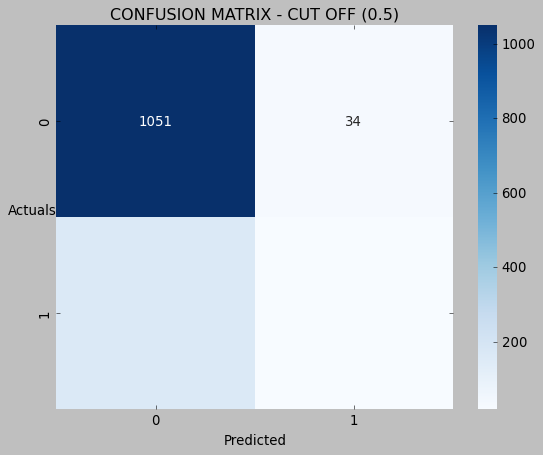

In [96]:
sns.heatmap((metrics.confusion_matrix(y_test,KNNs_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, KNNs_y_test_predict))

#### Can not help scaling data on KNN Algorithm

In [97]:
SVM = SVC()

In [98]:
SVM.fit(X_train,y_train)

SVC()

In [99]:
SVM_train_predict = SVM.predict(X_train)
SVM_test_predict = SVM.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2511
           1       0.97      0.07      0.13       457

    accuracy                           0.86      2968
   macro avg       0.91      0.53      0.53      2968
weighted avg       0.87      0.86      0.80      2968



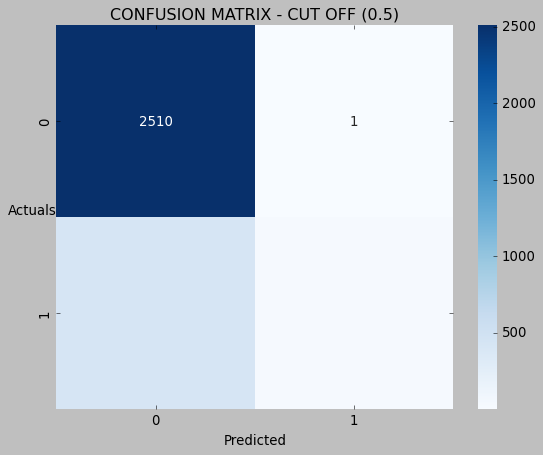

In [100]:
sns.heatmap((metrics.confusion_matrix(y_train,SVM_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, SVM_train_predict))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1085
           1       0.56      0.03      0.05       187

    accuracy                           0.85      1272
   macro avg       0.71      0.51      0.49      1272
weighted avg       0.81      0.85      0.79      1272



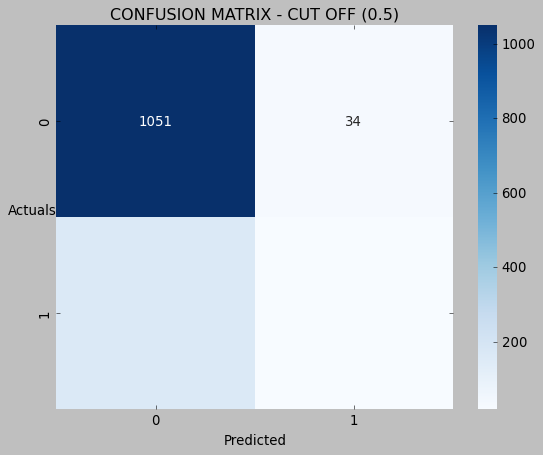

In [101]:
sns.heatmap((metrics.confusion_matrix(y_test,KNNs_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, SVM_test_predict))

In [109]:
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [135]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [136]:
make_confusion_matrix(KNN,y_test,labels=[1, 0])

TypeError: '<' not supported between instances of 'int' and 'str'

In [102]:
LD = pd.read_csv('letterdata.csv')

In [103]:
LD.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [104]:
clf = SVC(gamma = 0.025,C=3)

In [105]:
y = LD["letter"]
X = LD.drop("letter" , axis=1)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [107]:
clf.fit(X_train,y_train)

SVC(C=3, gamma=0.025)

In [108]:
clf_train_predict = clf.predict(X_train)
clf_test_predict = clf.predict(X_test)